In [3]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import wordnet as wn
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

import matplotlib.pyplot as plt

import pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../Dataset/employee_reviews.csv', encoding = "ISO-8859-1",error_bad_lines=False);
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

Note some null values in *summary* and *advice-to-mgmt*

In [5]:
data.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
data.groupby('company').count()

,Unnamed: 0,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
company,,,,,,,,,,,,,,,,
amazon,26430,26430,26430,26430,26391,26430,26430,26318,26430,26430,26430,26430,26430,26430,26430,26430
apple,12950,12950,12950,12950,12922,12950,12950,12885,12950,12950,12950,12950,12950,12950,12950,12950
facebook,1590,1590,1590,1590,1585,1590,1590,1583,1590,1590,1590,1590,1590,1590,1590,1590
google,7819,7819,7819,7819,7804,7819,7819,7789,7819,7819,7819,7819,7819,7819,7819,7819
microsoft,17930,17930,17930,17930,17906,17930,17930,17850,17930,17930,17930,17930,17930,17930,17930,17930
netflix,810,810,810,810,801,810,810,807,810,810,810,810,810,810,810,810


In [82]:
data.summary.fillna("", inplace=True)
data['advice-to-mgmt'].fillna("", inplace=True)

In [83]:
amazon_df=data.loc[data['company']=='amazon']

In [63]:
amazon_df

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
7819,7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5.0,4.0,5.0,5.0,5.0,5.0,580,https://www.glassdoor.com/Reviews/Amazon-Revie...
7820,7821,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5.0,5.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
7821,7822,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5.0,4.0,5.0,5.0,5.0,5.0,1759,https://www.glassdoor.com/Reviews/Amazon-Revie...
7822,7823,amazon,"Seattle, WA","Feb 20, 2016",Current Employee - Senior Engineering Manager,"Exciting Work, Abusive Culture","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...",Don't pretend that the recent NY Times article...,3.0,3.0,3.0,3.0,4.0,4.0,1404,https://www.glassdoor.com/Reviews/Amazon-Revie...
7823,7824,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4.0,3.0,3.0,5.0,5.0,4.0,1275,https://www.glassdoor.com/Reviews/Amazon-Revie...
7824,7825,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4.0,2.0,2.0,1.0,5.0,1.0,409,https://www.glassdoor.com/Reviews/Amazon-Revie...
7825,7826,amazon,"Carlisle, PA","May 15, 2017",Former Employee - Tier I Warehouse Associate,"Warehouse associate, full time for over two years",Great starting pay and the ability to get rais...,After 3 years of working with the company you ...,none,4.0,2.0,3.0,4.0,4.0,5.0,257,https://www.glassdoor.com/Reviews/Amazon-Revie...
7826,7827,amazon,"Seattle, WA","Mar 29, 2017",Current Employee - Finance Manager,"Great place to learn, churn n burn culture in ...","- super smart people, the best of the best fro...","- frugality is taken to the extreme, only 2 we...",The culture and reputation of amazon will neve...,4.0,1.0,2.0,4.0,3.0,3.0,245,https://www.glassdoor.com/Reviews/Amazon-Revie...
7827,7828,amazon,"Seattle, WA","Dec 7, 2018",Current Employee - Senior Product Manager,Sr. Product manager,Smartest people Iâve ever worked with. The a...,"Not a con, just hard work. But hard rewarding ...",Reconsider the base salary cap and lack of bas...,5.0,4.0,5.0,5.0,5.0,4.0,2,https://www.glassdoor.com/Reviews/Amazon-Revie...
7828,7829,amazon,none,"Dec 10, 2018",Current Employee - Anonymous Employee,Central operations,"Weekly pay, great pay,flexible shifts","Fighting for hours, unorganized and bad training",none,4.0,5.0,5.0,4.0,5.0,5.0,1,https://www.glassdoor.com/Reviews/Amazon-Revie...


In [84]:
amazon_df.reset_index(inplace=True)
amazon_df

,index,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,7819,7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5.0,4.0,5.0,5.0,5.0,5.0,580,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,7820,7821,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5.0,5.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
2,7821,7822,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5.0,4.0,5.0,5.0,5.0,5.0,1759,https://www.glassdoor.com/Reviews/Amazon-Revie...
3,7822,7823,amazon,"Seattle, WA","Feb 20, 2016",Current Employee - Senior Engineering Manager,"Exciting Work, Abusive Culture","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...",Don't pretend that the recent NY Times article...,3.0,3.0,3.0,3.0,4.0,4.0,1404,https://www.glassdoor.com/Reviews/Amazon-Revie...
4,7823,7824,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4.0,3.0,3.0,5.0,5.0,4.0,1275,https://www.glassdoor.com/Reviews/Amazon-Revie...
5,7824,7825,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4.0,2.0,2.0,1.0,5.0,1.0,409,https://www.glassdoor.com/Reviews/Amazon-Revie...
6,7825,7826,amazon,"Carlisle, PA","May 15, 2017",Former Employee - Tier I Warehouse Associate,"Warehouse associate, full time for over two years",Great starting pay and the ability to get rais...,After 3 years of working with the company you ...,none,4.0,2.0,3.0,4.0,4.0,5.0,257,https://www.glassdoor.com/Reviews/Amazon-Revie...
7,7826,7827,amazon,"Seattle, WA","Mar 29, 2017",Current Employee - Finance Manager,"Great place to learn, churn n burn culture in ...","- super smart people, the best of the best fro...","- frugality is taken to the extreme, only 2 we...",The culture and reputation of amazon will neve...,4.0,1.0,2.0,4.0,3.0,3.0,245,https://www.glassdoor.com/Reviews/Amazon-Revie...
8,7827,7828,amazon,"Seattle, WA","Dec 7, 2018",Current Employee - Senior Product Manager,Sr. Product manager,Smartest people Iâve ever worked with. The a...,"Not a con, just hard work. But hard rewarding ...",Reconsider the base salary cap and lack of bas...,5.0,4.0,5.0,5.0,5.0,4.0,2,https://www.glassdoor.com/Reviews/Amazon-Revie...
9,7828,7829,amazon,none,"Dec 10, 2018",Current Employee - Anonymous Employee,Central operations,"Weekly pay, great pay,flexible shifts","Fighting for hours, unorganized and bad training",none,4.0,5.0,5.0,4.0,5.0,5.0,1,https://www.glassdoor.com/Reviews/Amazon-Revie...


In [8]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26430 entries, 0 to 26429
Data columns (total 18 columns):
index                         26430 non-null int64
Unnamed: 0                    26430 non-null int64
company                       26430 non-null object
location                      26430 non-null object
dates                         26430 non-null object
job-title                     26430 non-null object
summary                       26430 non-null object
pros                          26430 non-null object
cons                          26430 non-null object
advice-to-mgmt                26430 non-null object
overall-ratings               26430 non-null float64
work-balance-stars            26430 non-null object
culture-values-stars          26430 non-null object
carrer-opportunities-stars    26430 non-null object
comp-benefit-stars            26430 non-null object
senior-mangemnet-stars        26430 non-null object
helpful-count                 26430 non-null int64
link     

### Preprocess data

- convert all words to lowercase
- tokenize the words
- remove numbers (but not words that contain numbers)
- remove words that have less than or equal to two characters
- remove stopwords
- lemmatize all words

No stemming of words is done for better understanding of words

In [80]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
lemmatizer = nltk.stem.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('amazon')
stoplist = nltk.corpus.stopwords.words('german')
stopwords.extend(stoplist)

In [54]:
def pre_process(docs):
    doc = docs.copy(deep=True)
    for idx in range(len(docs)):
        doc[idx] = docs[idx].lower()  # Convert to lowercase.
        doc[idx] = tokenizer.tokenize(doc[idx])  # Split into words.

        # Remove numbers, but not words that contain numbers.
        doc[idx] = [token for token in doc[idx] if not token.isdigit()]
        #docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
        # Remove words that are <= two characters.
        doc[idx] = [token for token in doc[idx] if len(token) > 2]
        #docs = [[token for token in doc if len(token) > 3] for doc in docs]
        
        # Remove stopwords
        doc[idx] = [token for token in doc[idx] if token not in stopwords]
    
        # Lemmatize all words in documents.
        doc[idx] = [lemmatizer.lemmatize(token) for token in doc[idx]]
        #docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
    
    return doc

In [85]:
all_columns = ['pros','cons','summary','advice-to-mgmt']

for col in all_columns:
    amazon_df[col] = pre_process(amazon_df[col])

In [86]:
amazon_df

,index,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,7819,7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,"[amazing, place, work]","[month, seen, none, horror, story, communicate...","[con, far, seriously, like, said, sure, bad, p...",[none],5.0,4.0,5.0,5.0,5.0,5.0,580,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,7820,7821,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...","[software, development, engineering, manager]","[work, hard, fun, make, history, proud, self, ...","[ru, grand, year, related, last, year, stock, ...",[none],5.0,5.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
2,7821,7822,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,"[get, put]","[really, smart, people, lot, opportunity, grow...","[self, motivated, one, hold, hand, tell, great...","[boarding, training, new, employee, thrown, fi...",5.0,4.0,5.0,5.0,5.0,5.0,1759,https://www.glassdoor.com/Reviews/Amazon-Revie...
3,7822,7823,amazon,"Seattle, WA","Feb 20, 2016",Current Employee - Senior Engineering Manager,"[exciting, work, abusive, culture]","[jeff, bezos, team, brilliant, continue, make,...","[management, process, abusive, currently, mana...","[pretend, recent, time, article, isolated, inc...",3.0,3.0,3.0,3.0,4.0,4.0,1404,https://www.glassdoor.com/Reviews/Amazon-Revie...
4,7823,7824,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"[amazing, people, horrible, others]","[lot, cool, stuff, lot, boring, stuff, really,...","[responsible, career, progression, finding, pl...","[stack, ranking, horrible, practice, since, ri...",4.0,3.0,3.0,5.0,5.0,4.0,1275,https://www.glassdoor.com/Reviews/Amazon-Revie...
5,7824,7825,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,"[world, condescended, inferior]","[company, get, list, performance, list, employ...","[maybe, company, recruit, lister, neither, mer...","[bezos, bought, washington, post, hired, jay, ...",4.0,2.0,2.0,1.0,5.0,1.0,409,https://www.glassdoor.com/Reviews/Amazon-Revie...
6,7825,7826,amazon,"Carlisle, PA","May 15, 2017",Former Employee - Tier I Warehouse Associate,"[warehouse, associate, full, time, two, year]","[great, starting, pay, ability, get, raise, qu...","[year, working, company, cap, meaning, longer,...",[none],4.0,2.0,3.0,4.0,4.0,5.0,257,https://www.glassdoor.com/Reviews/Amazon-Revie...
7,7826,7827,amazon,"Seattle, WA","Mar 29, 2017",Current Employee - Finance Manager,"[great, place, learn, churn, burn, culture, fi...","[super, smart, people, best, best, school, get...","[frugality, taken, extreme, week, vacation, pa...","[culture, reputation, never, change, unless, w...",4.0,1.0,2.0,4.0,3.0,3.0,245,https://www.glassdoor.com/Reviews/Amazon-Revie...
8,7827,7828,amazon,"Seattle, WA","Dec 7, 2018",Current Employee - Senior Product Manager,"[product, manager]","[smartest, people, ever, worked, ability, alwa...","[con, hard, work, hard, rewarding, work, donâ,...","[reconsider, base, salary, cap, lack, base, in...",5.0,4.0,5.0,5.0,5.0,4.0,2,https://www.glassdoor.com/Reviews/Amazon-Revie...
9,7828,7829,amazon,none,"Dec 10, 2018",Current Employee - Anonymous Employee,"[central, operation]","[weekly, pay, great, pay, flexible, shift]","[fighting, hour, unorganized, bad, training]",[none],4.0,5.0,5.0,4.0,5.0,5.0,1,https://www.glassdoor.com/Reviews/Amazon-Revie...


In [87]:
amazon_df['pros'].values

array([list(['month', 'seen', 'none', 'horror', 'story', 'communicated', 'public', 'although', 'large', 'enough', 'company', 'sure', 'good', 'pocket', 'bad', 'pocket', 'everyone', 'really', 'smart', 'want', 'succeed', 'personally', 'company', 'people', 'collaborate', 'help', 'focus', 'data', 'truly', 'focus', 'customer', 'every', 'company', 'ever', 'worked', 'talk', 'important', 'customer', 'day', 'forgotten', 'seems', 'genuinely', 'focus', 'best', 'customer', 'awesome', 'meeting', 'people', 'actually', 'bring', 'make', 'decision', 'focused', 'long', 'term', 'customer', 'satisfaction', 'opportunity', 'learn', 'literally', 'unlimited', 'opportunity', 'take', 'new', 'responsibility', 'well', 'honestly', 'believe', 'awesome', 'want']),
       list(['work', 'hard', 'fun', 'make', 'history', 'proud', 'self', 'job']),
       list(['really', 'smart', 'people', 'lot', 'opportunity', 'growth', 'always', 'encouraged', 'innovative', 'think', 'big', 'create', 'something', 'new', 'competitive', 'sa

### LDA on Amazon's pros

In [88]:
pro_dictionary = corpora.Dictionary(amazon_df['pros'].values)
#dictionary = gensim.corpora.Dictionary(documents=data.processed.values)
print("Found {} words.".format(len(pro_dictionary.values())))
#amazon_corpus = [amazon_pro_dictionary.doc2bow(text) for text in amazon_sentences]

Found 11254 words.


In [89]:
pro_dictionary.filter_extremes(no_above=0.9, no_below=3)

pro_dictionary.compactify()  # Reindexes the remaining words after filtering
print("Left with {} words.".format(len(pro_dictionary.values())))

Left with 4563 words.


In [90]:
pro_corpus = [pro_dictionary.doc2bow(doc) for doc in amazon_df['pros']]

In [71]:
def compute_coherence_values(dictionary, corpus,limit, start=2, step=3):
    """Function to calculate the coherence for each model with varying number of topics to find the optimal number of topics
    for the LDA Model"""
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [91]:
model_list, coherence_values = compute_coherence_values(dictionary=pro_dictionary, corpus=pro_corpus, start=2, limit=50, step=2)

#Save the model so we won't have to run the function again

filename = 'amazon_pro_coherence_models'
outfile = open(filename,'wb')
pickle.dump(model_list,outfile)
outfile.close()

filename = 'amazon_pro_coherence_val'
outfile = open(filename,'wb')
pickle.dump(coherence_values,outfile)
outfile.close()

In [6]:
# to open the files and retrieve model_list and coh_vals
pickle_in = open("amazon_pro_coherence_models","rb")
pro_model_list = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("amazon_pro_coherence_val", "rb")
pro_coh_val = pickle.load(pickle_in)
pickle_in.close()

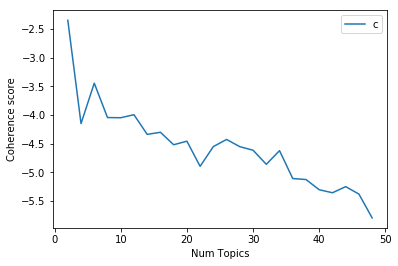

In [7]:
limit=50; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, pro_coh_val)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [94]:
print(pro_coh_val)

[-2.344667810707792, -4.149082639930639, -3.4437090701732447, -4.043780302726871, -4.04703925787243, -3.994296138790009, -4.3375482073066385, -4.300907057859787, -4.5188063948374655, -4.456493657748318, -4.895643475517162, -4.550554735755631, -4.426479575760283, -4.552399820412465, -4.614345157245797, -4.860192902687445, -4.622138913712645, -5.1090582694837785, -5.126140974060394, -5.304378680481895, -5.357183413190753, -5.250353844460164, -5.380386683891308, -5.796439965486851]


In [12]:
pro_model_list[0].print_topics(num_words=5)

[(0,
  '0.029*"work" + 0.022*"company" + 0.022*"good" + 0.019*"people" + 0.018*"lot"'),
 (1,
  '0.059*"work" + 0.053*"good" + 0.025*"great" + 0.019*"pay" + 0.016*"benefit"')]

### LDA on Amazon's cons

In [96]:
con_dictionary = corpora.Dictionary(amazon_df['cons'].values)

print("Found {} words.".format(len(con_dictionary.values())))

Found 16730 words.


In [97]:
con_dictionary.filter_extremes(no_above=0.9, no_below=3)

con_dictionary.compactify()  # Reindexes the remaining words after filtering
print("Left with {} words.".format(len(con_dictionary.values())))

Left with 6957 words.


In [98]:
con_corpus = [con_dictionary.doc2bow(doc) for doc in amazon_df['cons']]

In [99]:
model_list, coherence_values = compute_coherence_values(dictionary=con_dictionary, corpus=con_corpus, start=2, limit=50, step=2)

#Save the model so we won't have to run the function again

import pickle
filename = 'amazon_con_coherence_models'
outfile = open(filename,'wb')
pickle.dump(model_list,outfile)
outfile.close()

filename = 'amazon_con_coherence_val'
outfile = open(filename,'wb')
pickle.dump(coherence_values,outfile)
outfile.close()

In [9]:
pickle_in = open("amazon_con_coherence_models","rb")
con_model_list = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("amazon_con_coherence_val", "rb")
con_coh_val = pickle.load(pickle_in)
pickle_in.close()

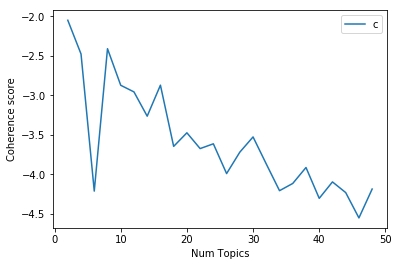

In [101]:
limit=50; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, con_coh_val)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [102]:
print(con_coh_val)

[-2.0478809641246807, -2.475350778098928, -4.211156467226494, -2.4081581280622686, -2.871314287132396, -2.9551494170891903, -3.262448783470389, -2.86999426876326, -3.644952115123524, -3.4729548743320793, -3.6728412083719415, -3.6124237830095485, -3.9893264560885373, -3.71785877786752, -3.5252445766875713, -3.868053789289146, -4.205834572836868, -4.1142529764976015, -3.9122125750617913, -4.302878024090079, -4.094813942529301, -4.229740682143267, -4.550695444026609, -4.185021970495199]


In [10]:
con_model_list[0].print_topics(num_words=5)

[(0,
  '0.042*"work" + 0.018*"life" + 0.015*"balance" + 0.013*"team" + 0.013*"company"'),
 (1,
  '0.019*"hour" + 0.018*"time" + 0.016*"work" + 0.011*"employee" + 0.011*"long"')]

### LDA on Amazon's summary

In [106]:
sum_dictionary = corpora.Dictionary(amazon_df['summary'].values)

print("Found {} words.".format(len(sum_dictionary.values())))

Found 5473 words.


Since there are very few words, we do not filter them further.

In [107]:
sum_corpus = [sum_dictionary.doc2bow(doc) for doc in amazon_df['summary']]

In [108]:
model_list, coherence_values = compute_coherence_values(dictionary=sum_dictionary, corpus=sum_corpus, start=2, limit=50, step=2)

#Save the model so we won't have to run the function again

import pickle
filename = 'amazon_sum_coherence_models'
outfile = open(filename,'wb')
pickle.dump(model_list,outfile)
outfile.close()

filename = 'amazon_sum_coherence_val'
outfile = open(filename,'wb')
pickle.dump(coherence_values,outfile)
outfile.close()

In [14]:
pickle_in = open("amazon_sum_coherence_models","rb")
sum_model_list = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("amazon_sum_coherence_val", "rb")
sum_coh_val = pickle.load(pickle_in)
pickle_in.close()

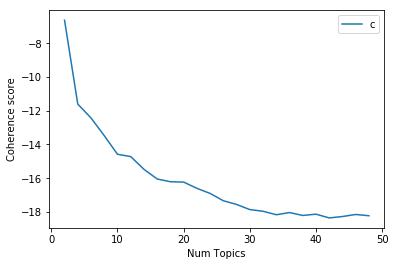

In [110]:
limit=50; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, sum_coh_val)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [111]:
print(sum_coh_val)

[-6.632595234518372, -11.6053882825729, -12.427823174577371, -13.476410352856423, -14.58095453680115, -14.71893967721632, -15.474157025167008, -16.04764798934852, -16.21189974208252, -16.231774718442757, -16.600614022549, -16.904883889488705, -17.339151809286697, -17.558508866051486, -17.86208393620958, -17.96233807629215, -18.168408020939783, -18.039065248248527, -18.210682790092438, -18.134841400383916, -18.357074486854774, -18.27438511937732, -18.153653205196207, -18.22714746818801]


In [16]:
sum_model_list[0].print_topics(num_words=5)

[(0,
  '0.060*"good" + 0.050*"company" + 0.042*"work" + 0.023*"experience" + 0.023*"great"'),
 (1,
  '0.074*"work" + 0.072*"place" + 0.044*"great" + 0.032*"manager" + 0.026*"associate"')]

### LDA on Amazon's advice-to-mgmt

In [113]:
adv_dictionary = corpora.Dictionary(amazon_df['advice-to-mgmt'].values)

print("Found {} words.".format(len(adv_dictionary.values())))

Found 10641 words.


In [114]:
adv_dictionary.filter_extremes(no_above=0.9, no_below=3)

adv_dictionary.compactify()  # Reindexes the remaining words after filtering
print("Left with {} words.".format(len(adv_dictionary.values())))

Left with 4348 words.


In [115]:
adv_corpus = [adv_dictionary.doc2bow(doc) for doc in amazon_df['advice-to-mgmt']]

In [116]:
model_list, coherence_values = compute_coherence_values(dictionary=adv_dictionary, corpus=adv_corpus, start=2, limit=50, step=2)

#Save the model so we won't have to run the function again

import pickle
filename = 'amazon_adv_coherence_models'
outfile = open(filename,'wb')
pickle.dump(model_list,outfile)
outfile.close()

filename = 'amazon_adv_coherence_val'
outfile = open(filename,'wb')
pickle.dump(coherence_values,outfile)
outfile.close()

In [17]:
pickle_in = open("amazon_adv_coherence_models","rb")
adv_model_list = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("amazon_adv_coherence_val", "rb")
adv_coh_val = pickle.load(pickle_in)
pickle_in.close()

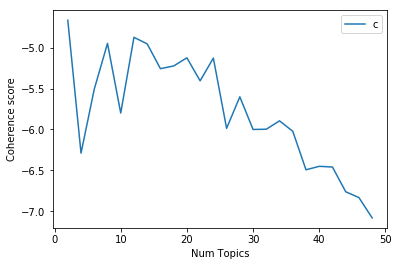

In [118]:
limit=50; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, adv_coh_val)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [119]:
print(adv_coh_val)

[-4.66415132080072, -6.28925310811598, -5.507146189831839, -4.947166253037595, -5.799072590348996, -4.872758931845359, -4.953403541960462, -5.256520907479748, -5.223225160836591, -5.123892238636358, -5.404864457928344, -5.12702818932132, -5.986257868494247, -5.600564312000553, -5.999861632129905, -5.996865849756244, -5.894440271461836, -6.021811422673639, -6.4930759370482, -6.450558197709308, -6.4589846697597535, -6.76133713121182, -6.832707999572595, -7.081452741529007]


In [18]:
adv_model_list[0].print_topics(num_words=5)

[(0,
  '0.268*"none" + 0.056*"employee" + 0.017*"treat" + 0.012*"customer" + 0.011*"like"'),
 (1,
  '0.023*"work" + 0.020*"people" + 0.013*"employee" + 0.013*"manager" + 0.011*"good"')]